📊 Distribuição dos valores de cada feature:
              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.0

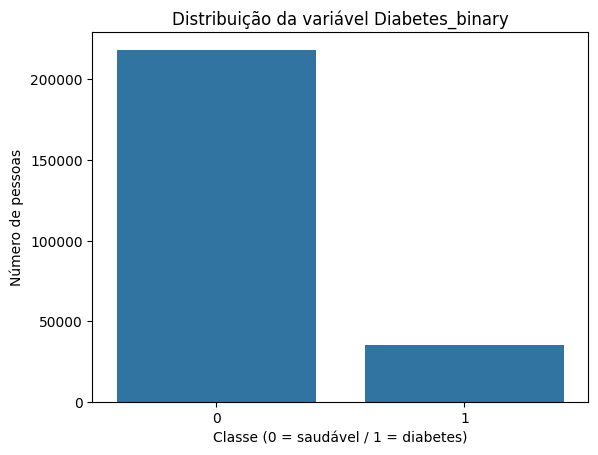


🔎 Variância das features:
CholCheck                0.035937
Stroke                   0.038925
AnyHealthcare            0.046552
HvyAlcoholConsump        0.053039
NoDocbcCost              0.077091
HeartDiseaseorAttack     0.085315
DiffWalk                 0.139925
Veggies                  0.153018
PhysActivity             0.184186
Fruits                   0.231976
HighChol                 0.244243
HighBP                   0.244960
Sex                      0.246442
Smoker                   0.246771
Education                0.971751
GenHlth                  1.141644
Income                   4.289652
Age                      9.328262
BMI                     43.674839
MentHlth                54.950296
PhysHlth                76.002675
dtype: float64

⚖️ Proporção das classes em y (Diabetes_binary):
Diabetes_binary
0    0.860667
1    0.139333
Name: proportion, dtype: float64

🧩 Features com baixa variância (< 0.01):
Series([], dtype: float64)


KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline



# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
#print(cdc_diabetes_health_indicators.metadata)

# variable information
#print(cdc_diabetes_health_indicators.variables)


y = y["Diabetes_binary"]

X = X.head(1000)
y = y.head(1000)
# print(X.head(10))

def diagnostico_dataset(X, y):
    print("📊 Distribuição dos valores de cada feature:")
    print(X.describe())
    sns.countplot(x=y)
    plt.title("Distribuição da variável Diabetes_binary")
    plt.xlabel("Classe (0 = saudável / 1 = diabetes)")
    plt.ylabel("Número de pessoas")
    plt.show()

    print("\n🔎 Variância das features:")
    print(X.var().sort_values())

    print("\n⚖️ Proporção das classes em y (Diabetes_binary):")
    print(y.value_counts(normalize=True))

    print("\n🧩 Features com baixa variância (< 0.01):")
    baixa_var = X.var()[X.var() < 0.01]
    print(baixa_var)

diagnostico_dataset(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def melhor_knn_acuracia():
    k_values = range(1, 22)
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, accuracies, marker='o', label="Acurácia", color="royalblue")
    plt.xlabel("Valor de K")
    plt.ylabel("Acurácia no conjunto de teste")
    plt.title("KNN: Acurácia vs K (sem validação cruzada)")
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.show()

    best_k = k_values[np.argmax(accuracies)]
    maior = max(accuracies)
    print(f"Melhor valor de K: {best_k} com acurácia {maior:.4f}")

melhor_knn_acuracia()


def melhor_knn_valid_cruzada():
    k_values = range(1, 21)
    accuracies = []
    recalls = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        acc = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
        recall = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='recall').mean()

        accuracies.append(acc)
        recalls.append(recall)

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, accuracies, marker='o', label="Acurácia")
    plt.plot(k_values, recalls, marker='s', label="Recall", linestyle='--')
    plt.xlabel("Valor de K")
    plt.ylabel("Pontuação média")
    plt.title("KNN: Acurácia e Recall vs K (validação cruzada)")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

melhor_knn_valid_cruzada()

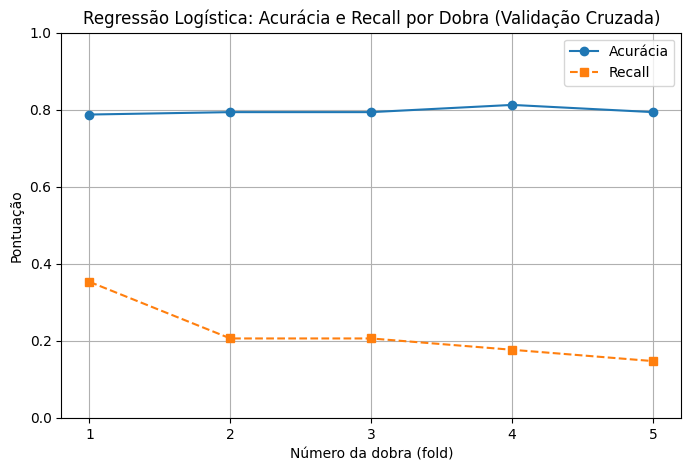

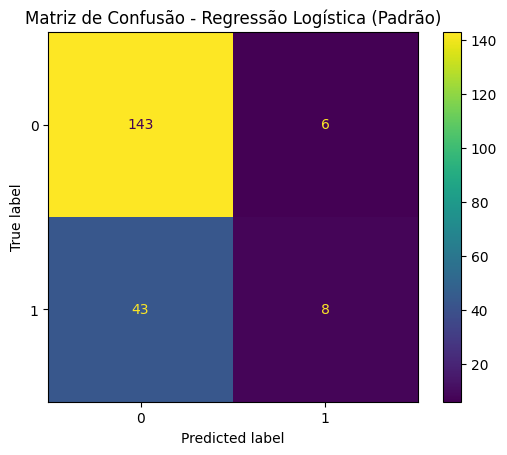

🔍 Melhor combinação de hiperparâmetros: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}


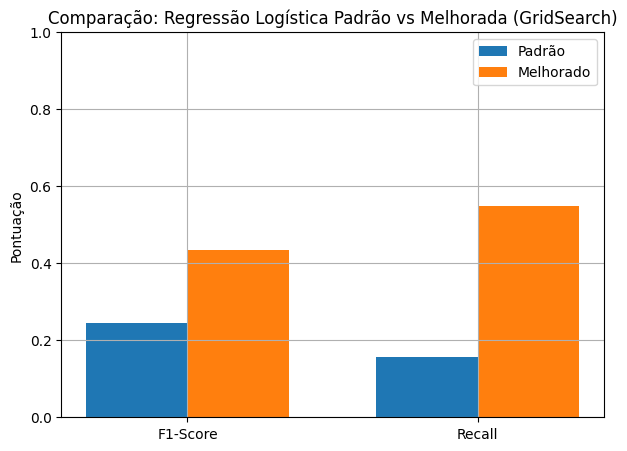

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score



def avalia_logreg_pontuacoes(X_train_scaled, y_train):
    model = LogisticRegression(solver='liblinear')

    acc = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    recall = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='recall')

    return acc, recall

def plota_resultado_logreg(acc_scores, recall_scores):
    folds = range(1, len(acc_scores) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(folds, acc_scores, marker='o', label="Acurácia")
    plt.plot(folds, recall_scores, marker='s', label="Recall", linestyle='--')
    plt.title("Regressão Logística: Acurácia e Recall por Dobra (Validação Cruzada)")
    plt.xlabel("Número da dobra (fold)")
    plt.ylabel("Pontuação")
    plt.ylim(0, 1)
    plt.xticks(folds)
    plt.grid(True)
    plt.legend()
    plt.show()

acc_scores, recall_scores = avalia_logreg_pontuacoes(X_train_scaled, y_train)
plota_resultado_logreg(acc_scores, recall_scores)



# Instancia e treina o modelo
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train_scaled, y_train)

# Previsões
y_pred = logreg.predict(X_test_scaled)

# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusão - Regressão Logística (Padrão)")
plt.show()





# Define o modelo base
logreg = LogisticRegression(solver="liblinear")

# Grade de hiperparâmetros a testar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

# Busca com validação cruzada
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)

# Melhor modelo e seus parâmetros
best_model = grid.best_estimator_
print("🔍 Melhor combinação de hiperparâmetros:", grid.best_params_)




def compara_modelos(modelo1, modelo2, X_test_scaled, y_test):
    y_pred1 = modelo1.predict(X_test_scaled)
    y_pred2 = modelo2.predict(X_test_scaled)

    f1_1 = f1_score(y_test, y_pred1)
    f1_2 = f1_score(y_test, y_pred2)

    recall_1 = recall_score(y_test, y_pred1)
    recall_2 = recall_score(y_test, y_pred2)

    plt.figure(figsize=(7, 5))
    bar_width = 0.35
    labels = ['F1-Score', 'Recall']

    plt.bar(np.arange(2), [f1_1, recall_1], width=bar_width, label='Padrão')
    plt.bar(np.arange(2) + bar_width, [f1_2, recall_2], width=bar_width, label='Melhorado')

    plt.xticks(np.arange(2) + bar_width / 2, labels)
    plt.ylabel("Pontuação")
    plt.ylim(0, 1)
    plt.title("Comparação: Regressão Logística Padrão vs Melhorada (GridSearch)")
    plt.legend()
    plt.grid(True)
    plt.show()



# Modelo padrão
modelo_padrao = LogisticRegression(solver="liblinear")
modelo_padrao.fit(X_train_scaled, y_train)

# Melhor modelo com hiperparâmetros
modelo_melhorado = grid.best_estimator_

# Comparar
compara_modelos(modelo_padrao, modelo_melhorado, X_test_scaled, y_test)

